In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

In [17]:
dataset = pd.read_csv(r'C:\Z\Data Science\custumers_churn\churn_dataset.csv')
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
dataset.shape

(7043, 21)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7036 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    6988 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
# deleting custumer id
dataset = dataset.drop(dataset[["customerID"]], axis= 1)
# drop duplicates
dataset.drop_duplicates(inplace=True)
# change TotalCharges from object to number
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors= 'coerce')

In [21]:
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               7
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity      55
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod       41
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
#tach data
target = 'Churn'
x = dataset.iloc[:,:-1]
y = dataset[target]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 42)
missing= []

#dien missing values cho bo train va bo test
for col in x_train.columns:
    if dataset[col].isnull().sum() != 0:
        missing.append(col)

for col in missing:
    if col == 'tenure' or col == 'TotalCharges':
        x_train[col].fillna(round(x_train[col].median(),0), inplace= True)
        x_test[col].fillna(round(x_test[col].median(),0), inplace= True)
    else:
        x_train[col].fillna(x_train[col].mode()[0], inplace = True)
        x_test[col].fillna(x_test[col].mode()[0], inplace = True)

C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_13024\1893894342.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train[col].fillna(round(x_train[col].median(),0), inplace= True)
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_13024\1893894342.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [23]:
x_train.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1486
TotalCharges        5286
dtype: int64

In [24]:
for col in x_train.columns:
    print(f'{col}:',x_train[col].unique(), '\n')

gender: ['Female' 'Male'] 

SeniorCitizen: [0 1] 

Partner: ['No' 'Yes'] 

Dependents: ['No' 'Yes'] 

tenure: [ 4. 33.  9. 29. 35. 28. 18. 42. 63. 62. 57. 48.  2. 72. 20. 71.  5. 39.
 31. 68.  1. 22. 13.  8. 15. 17. 19. 25.  7. 47. 41. 43. 30. 16. 46. 52.
 21. 51. 55. 60. 40. 49. 11. 66. 36. 67.  3. 12. 10. 69. 27. 23. 50. 58.
 54. 37. 34. 14. 53. 24. 61. 32. 64. 56. 45. 26.  6. 38. 59. 70. 65. 44.
  0.] 

PhoneService: ['Yes' 'No'] 

MultipleLines: ['No' 'Yes' 'No phone service'] 

InternetService: ['Fiber optic' 'No' 'DSL'] 

OnlineSecurity: ['No' 'No internet service' 'Yes'] 

OnlineBackup: ['No' 'Yes' 'No internet service'] 

DeviceProtection: ['No' 'Yes' 'No internet service'] 

TechSupport: ['No' 'No internet service' 'Yes'] 

StreamingTV: ['No' 'No internet service' 'Yes'] 

StreamingMovies: ['Yes' 'No' 'No internet service'] 

Contract: ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling: ['Yes' 'No'] 

PaymentMethod: ['Electronic check' 'Credit card (automatic)' 'Maile

In [25]:
x_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5616.000000,5616.000000,5616.000000,5616.000000
mean,0.164530,32.358084,64.827030,2285.694774
std,0.370789,24.395826,30.165926,2263.061084
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,407.950000
50%,0.000000,29.000000,70.300000,1403.000000
75%,0.000000,55.000000,90.100000,3782.800000
max,1.000000,72.000000,118.750000,8684.800000


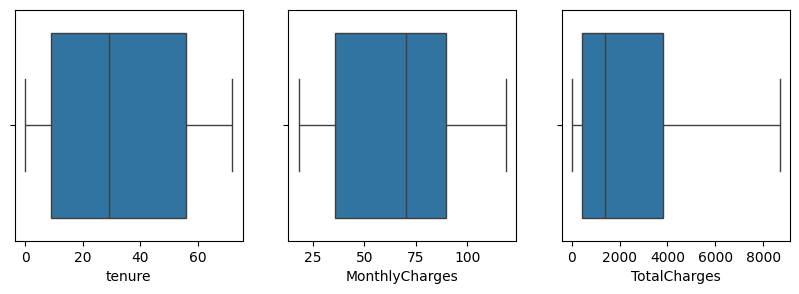

In [26]:
fig, ax = plt.subplots(1,3, figsize =(10,3));
columns = ['tenure','MonthlyCharges','TotalCharges']
for in_col in range(1,len(columns)+1):
    sns.boxplot(x= dataset[columns[in_col-1]], ax=ax[in_col-1])

In [27]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

Q1 = x_train[cols].quantile(0.25)
Q3 = x_train[cols].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
#Removing the outliers
# Check if removing outliers would result in an empty DataFrame
outlier_mask = ((x_train[cols] < (Q1 - 1.5 * IQR)) |(x_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
if x_train[~outlier_mask].empty:
    print("Warning: Removing outliers would result in an empty DataFrame. Skipping outlier removal.")
else:
    x_train = x_train[~outlier_mask]

tenure              9.00
MonthlyCharges     35.50
TotalCharges      407.95
Name: 0.25, dtype: float64
tenure              55.0
MonthlyCharges      90.1
TotalCharges      3782.8
Name: 0.75, dtype: float64
tenure              46.00
MonthlyCharges      54.60
TotalCharges      3374.85
dtype: float64


Text(0.5, 1.0, 'Dependents')

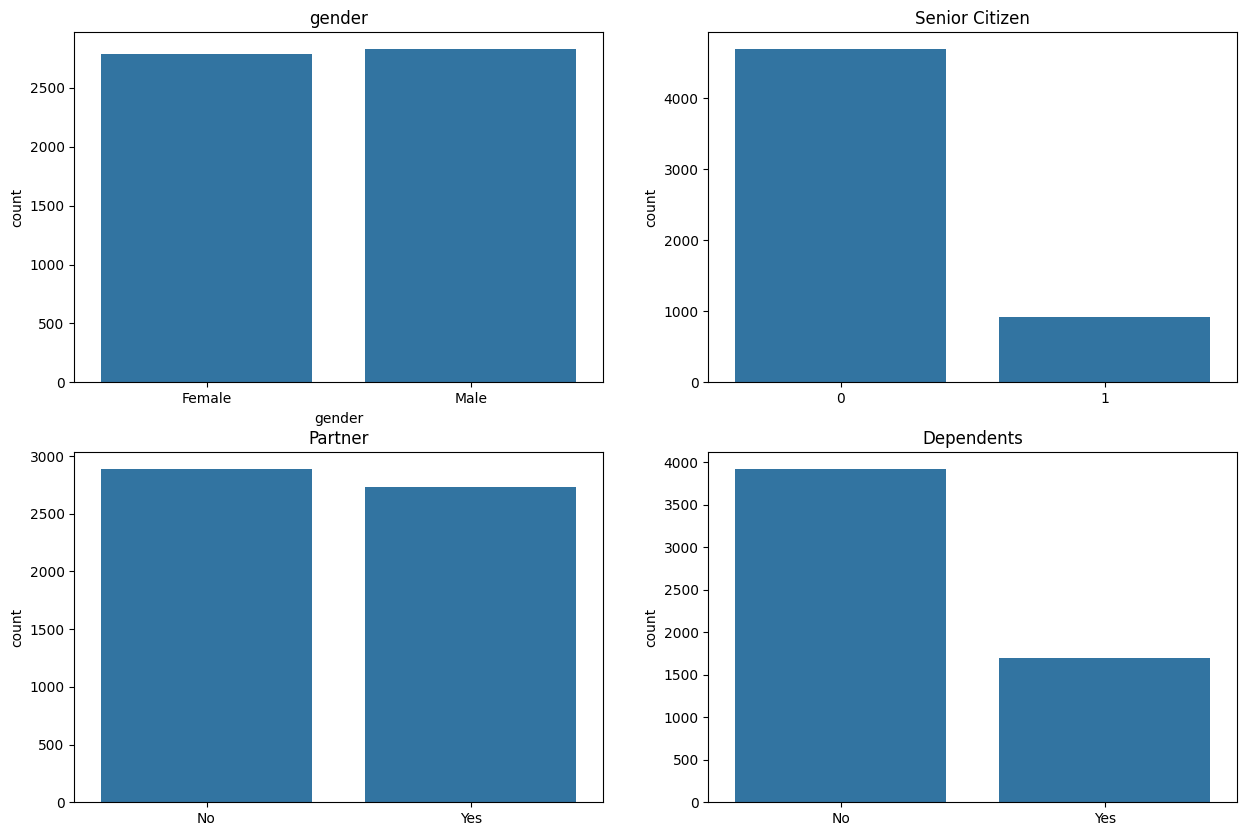

In [28]:
fig, ax = plt.subplots(2,2, figsize =(15,10))

#gender
sns.countplot(x= x_train['gender'], ax = ax[0,0]).set_title('gender')
#SeniorCitizen
sns.barplot(y = x_train['SeniorCitizen'].value_counts(), x = x_train['SeniorCitizen'].unique(), ax=ax[0,1]).set_title('Senior Citizen')
#Partner
sns.barplot(y= x_train['Partner'].value_counts(), x = x_train['Partner'].unique(), ax=ax[1,0]).set_title('Partner')
#Dependents
sns.barplot(y=x_train['Dependents'].value_counts(), x = x_train['Dependents'].unique(), ax=ax[1,1]).set_title('Dependents')

- Qua đây thấy được nhân khẩu học của khách hàng:
  + Không có quá nhiều sự chênh lệch giữa nam và nữ, khách hàng tập trung vào nhóm người không có độ tuổi quá cao.
  + khách hàng cân bằng cả đã có gia đình và chưa có gia đình
  + Phần lớn khách hàng không phụ thuộc vào người khác tuy nhiên cũng có một phần lớn có sự phụ thuộc vào ai

=> Các yếu tố về nhân khẩu có thể có tác động tới cảm xúc của khách hàng quyết định rời bỏ  

Text(0.5, 1.0, 'Streaming Movies')

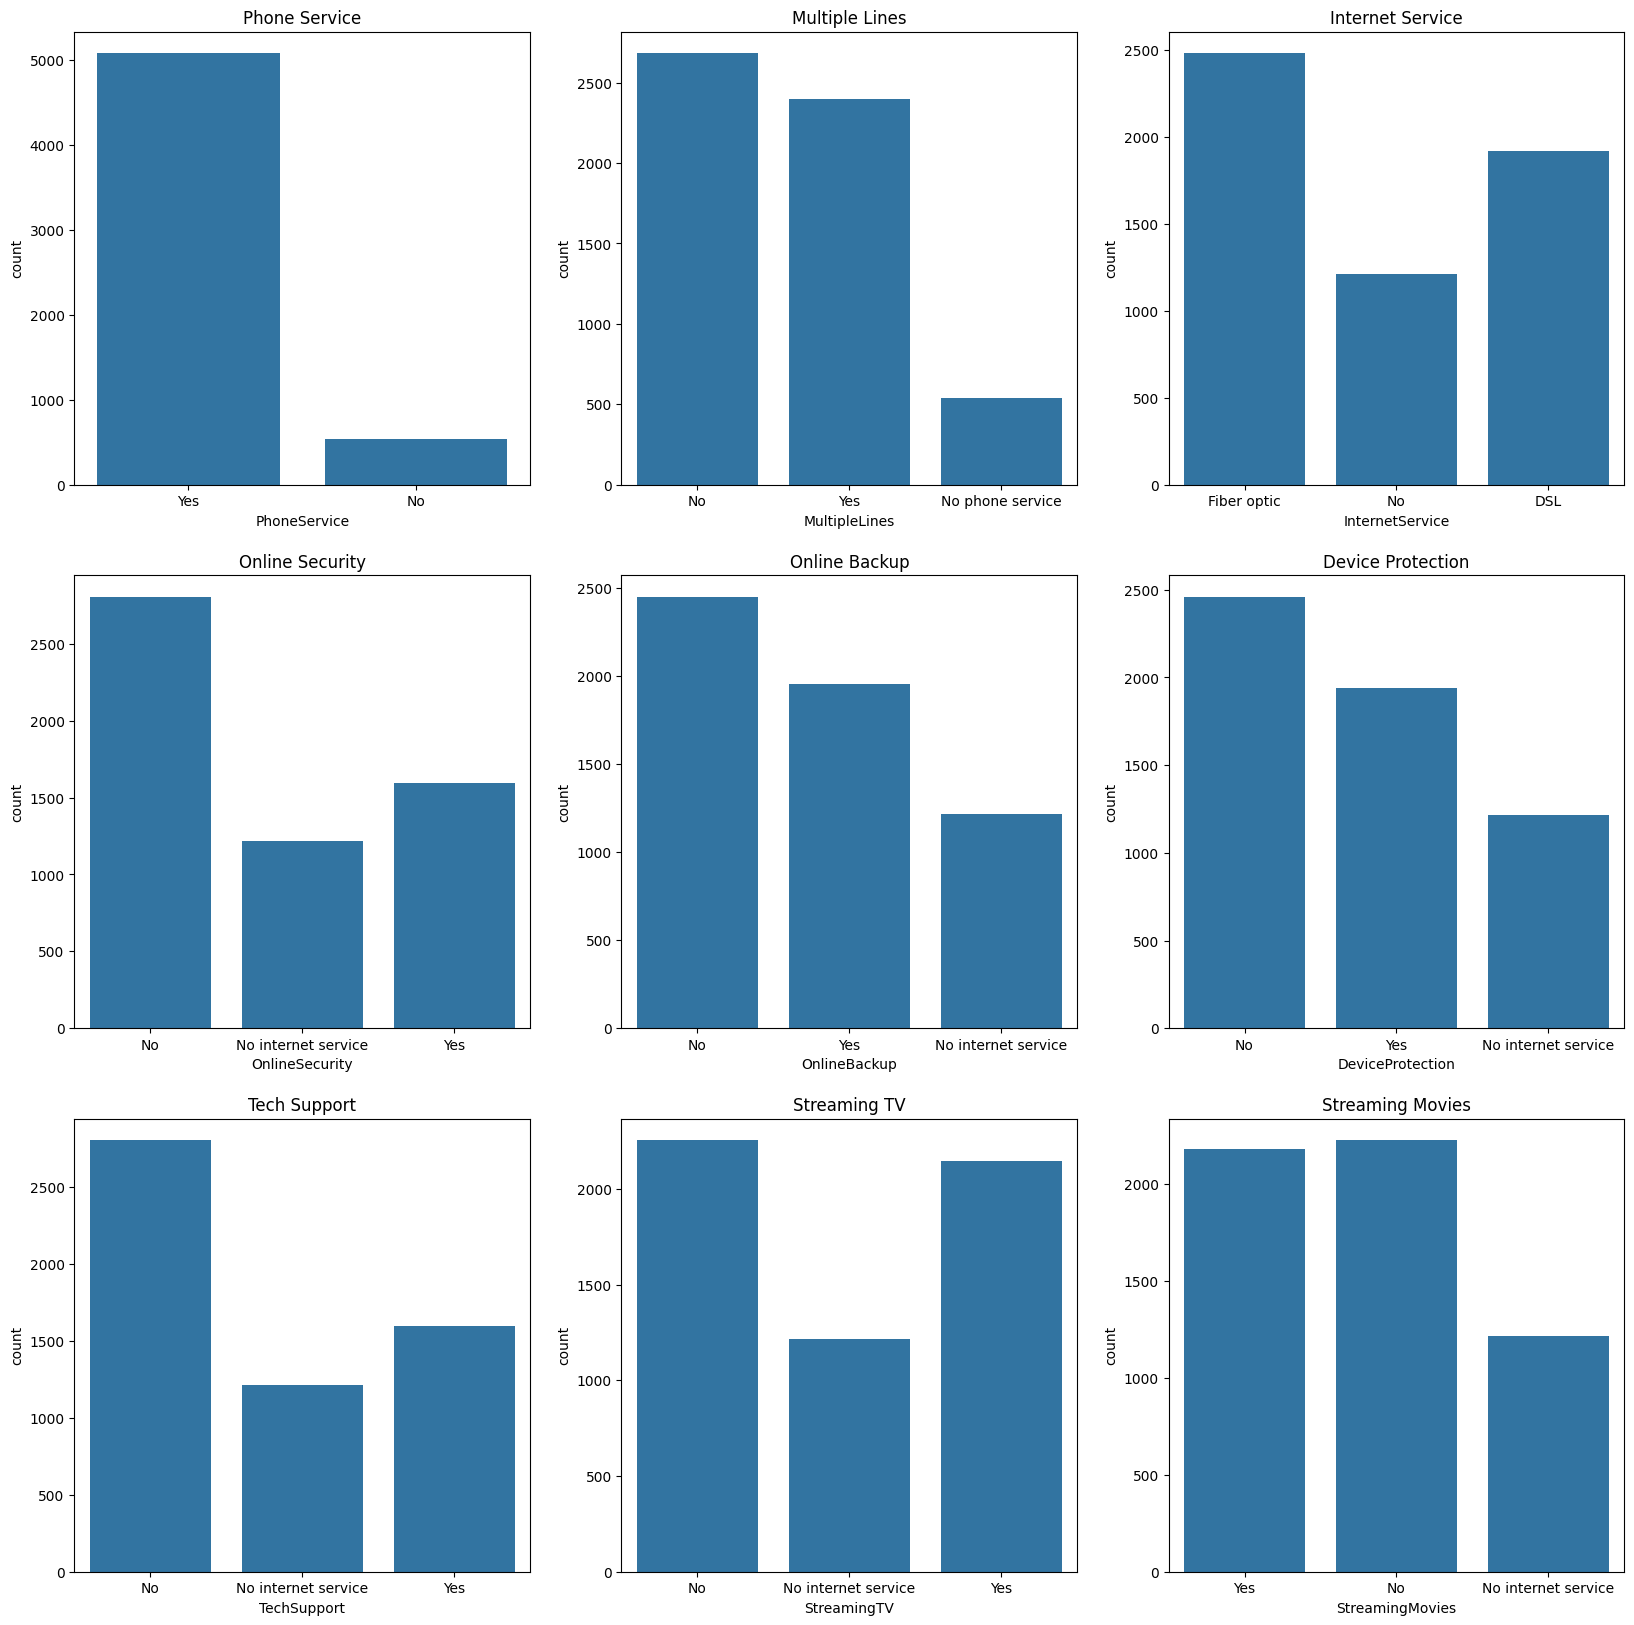

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

#phone service
sns.countplot(x = x_train['PhoneService'], ax=ax[0,0]).set_title('Phone Service')
#Multiple Lines
sns.countplot(x = x_train['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')
#Internet Service
sns.countplot(x = x_train['InternetService'], ax=ax[0,2]).set_title('Internet Service')
#Online Security
sns.countplot(x = x_train['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')
#Online Backup
sns.countplot(x = x_train['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')
#Device Protection
sns.countplot(x = x_train['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')
#Tech Support
sns.countplot(x = x_train['TechSupport'], ax=ax[2,0]).set_title('Tech Support')
#Streaming TV
sns.countplot(x = x_train['StreamingTV'], ax=ax[2,1]).set_title('Streaming TV')
#Streaming Movies
sns.countplot(x = x_train['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')

Các biểu đồ trên cho thấy dịch vụ điện thoại và internet là hai dịch vụ phổ biến nhất của công ty viễn thông, với gần 6000 khách hàng dùng điện thoại và khoảng 5500 khách hàng dùng internet (trong đó 3000 khách hàng chọn cáp quang, số còn lại chọn DSL).

Ở các dịch vụ khác như Bảo mật trực tuyến, Sao lưu trực tuyến, Bảo vệ thiết bị, Hỗ trợ kỹ thuật và Dịch vụ phát trực tuyến, thì dịch vụ phát trực tuyến thu hút hơn 2500 khách hàng, cao nhất trong nhóm này. Trong khi đó, dịch vụ bảo mật và hỗ trợ kỹ thuật ít được quan tâm hơn, chỉ khoảng 2000 khách hàng đăng ký.

Tóm lại, ngoài điện thoại và internet, dịch vụ phát trực tuyến là dịch vụ được ưa chuộng nhất. Công ty nên tập trung nâng cao chất lượng dịch vụ này để đáp ứng nhu cầu khách hàng.

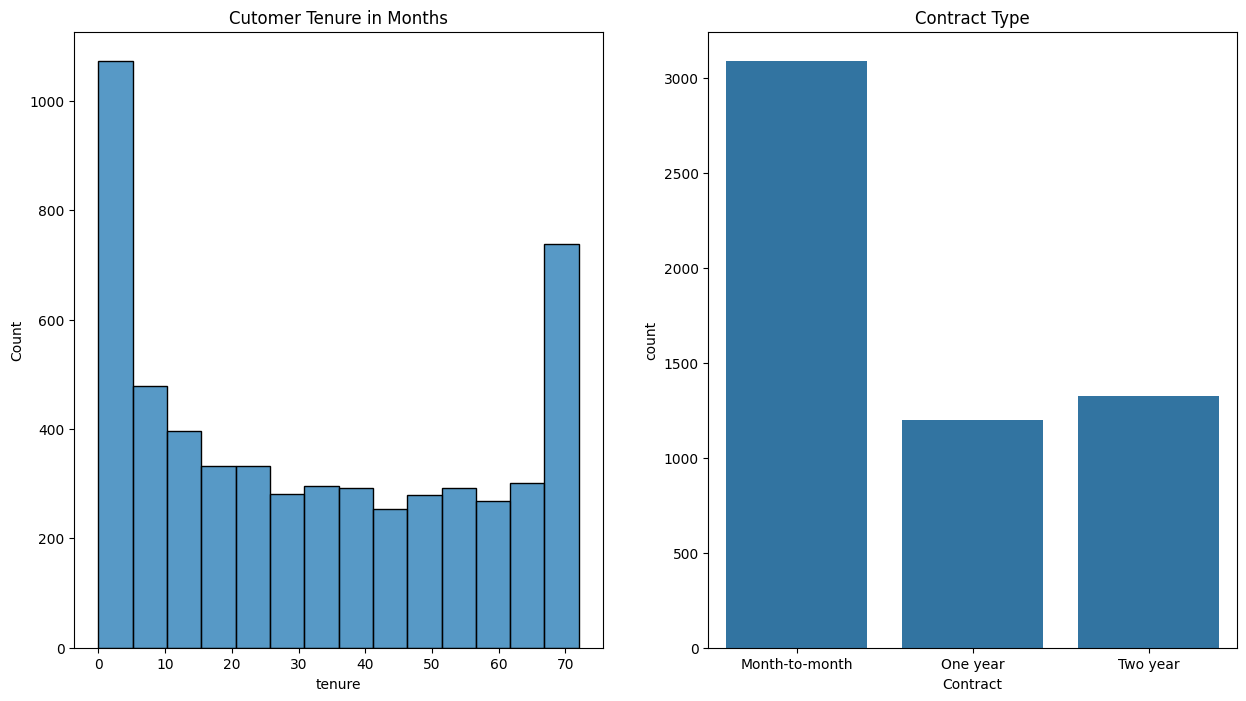

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8));

#Cutomer Tenure in Months
sns.histplot(x = x_train['tenure'], ax= ax[0]).set_title('Cutomer Tenure in Months');
#Contract Type
sns.countplot(x = x_train['Contract'], ax= ax[1]).set_title('Contract Type');

Biểu đồ cho thấy đa số khách hàng chỉ gắn bó chưa đầy một tháng và chọn hợp đồng theo tháng. Một lượng lớn khách hàng gắn bó khoảng 70 tháng, thể hiện sự trung thành. Sau hợp đồng theo tháng, hợp đồng hai năm được khoảng 1700 khách hàng lựa chọn. Phần còn lại có thời gian gắn bó từ 1–5 năm.



Text(0.5, 1.0, 'Total Charges')

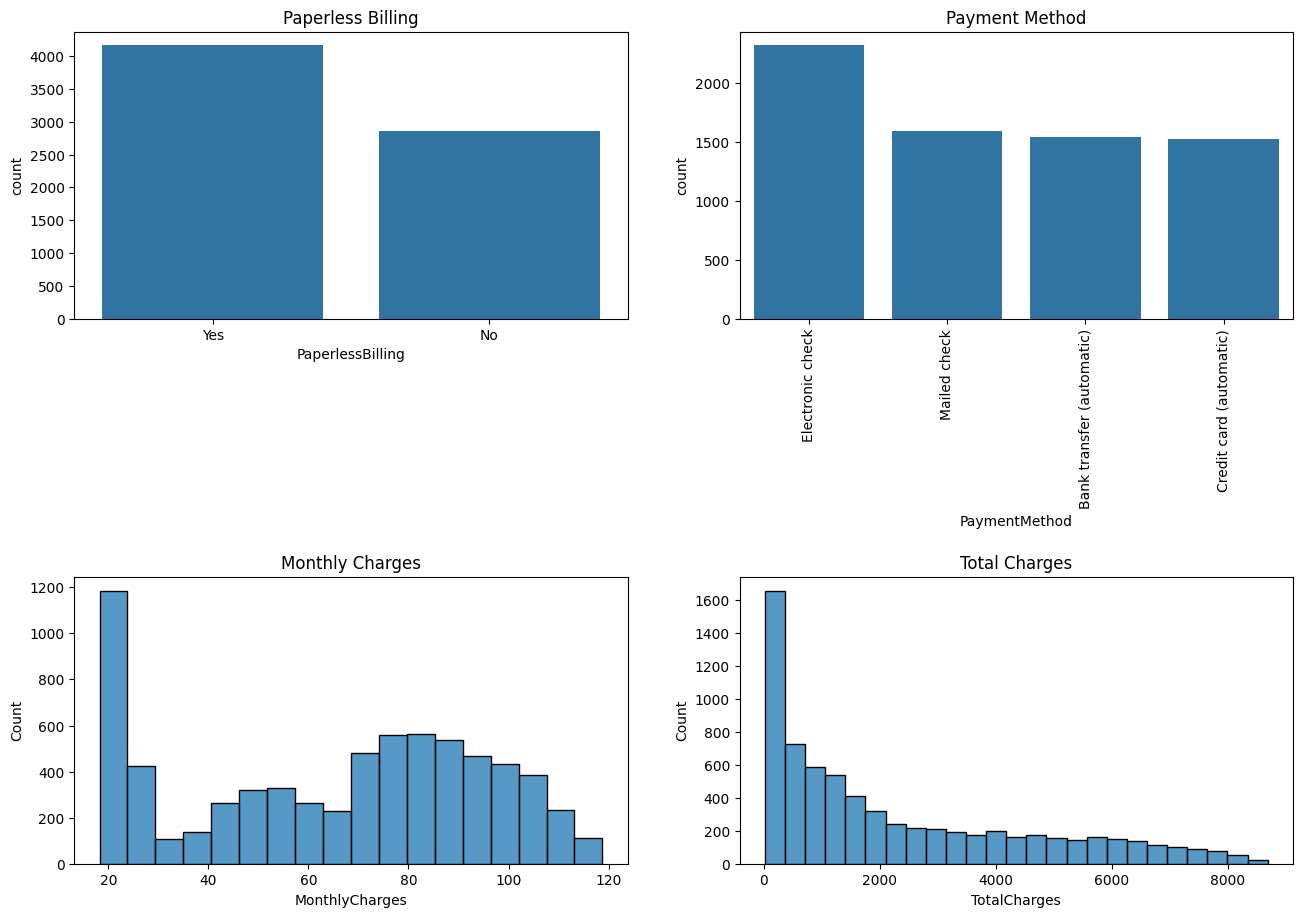

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.tight_layout(pad=5.0)

#spacing between subplots
fig.subplots_adjust(hspace=0.9)
#papaerless billing
sns.countplot(x = dataset['PaperlessBilling'], ax=ax[0,0]).set_title('Paperless Billing')
#Payment Method
sns.countplot(x = dataset['PaymentMethod'], ax=ax[0,1]).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)
#Monthly Charges
sns.histplot(x = dataset['MonthlyCharges'], ax = ax[1,0]).set_title('Monthly Charges')
#Total Charges
sns.histplot(x = dataset['TotalCharges'], ax = ax[1,1]).set_title('Total Charges')

Phần lớn khách hàng (gần 4000) chọn hóa đơn điện tử và hơn một nửa trong số đó thanh toán qua séc điện tử. Ngoài ra, khoảng 4500 khách hàng dùng séc bưu điện, chuyển khoản ngân hàng hoặc thẻ tín dụng.

Hầu hết khách hàng trả khoảng 20 đô mỗi tháng và có tổng chi phí dưới 200 đô. Một số khách hàng trả phí hàng tháng cao hơn (70–100 đô) và tổng chi phí 200–800 đô. Đặc biệt, có khách hàng tổng chi phí vượt 4000 hoặc 8000 đô, thường do gắn bó lâu hoặc dùng nhiều dịch vụ.

Tóm lại, đa số khách hàng có mức chi phí thấp, công ty nên tập trung cung cấp dịch vụ giá rẻ để giữ chân họ.



Text(0.5, 1.0, 'churn')

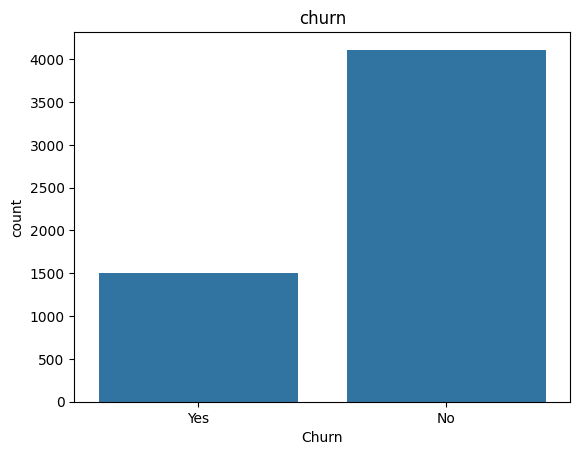

In [32]:
#churn
sns.countplot(x = y_train).set_title("churn")

# SO SÁNH TƯƠNG QUAN

Ở đây ta thấy được dữ số lượng dữ liệu khách hàng rời bỏ ít hơn nhiều so với khách hàng ở lại nên cần sử dụng các phương pháp M/L để giảm lệch label  

Text(0.5, 1.0, 'Dependents and Churn')

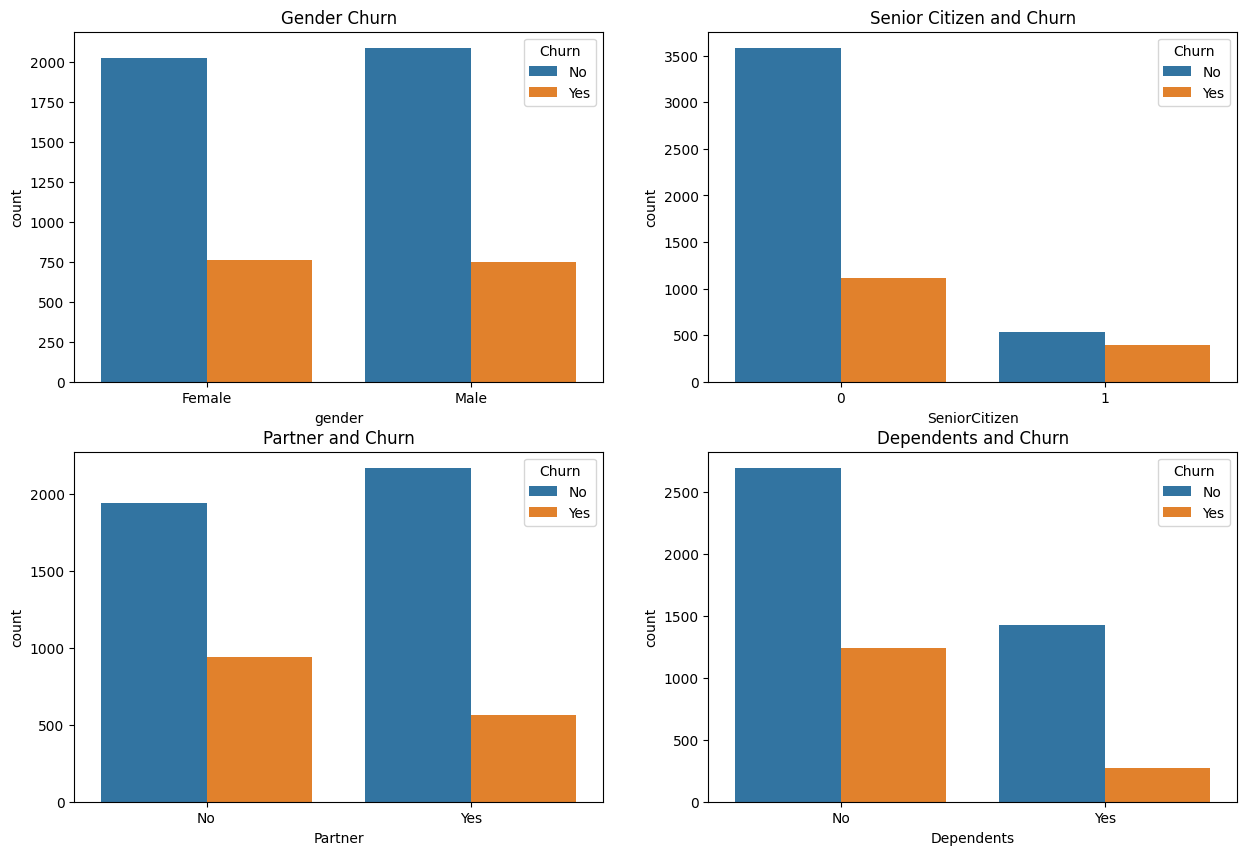

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Gender Distribution
sns.countplot(x = x_train['gender'], hue = y_train, ax=ax[0,0],hue_order=["No",'Yes']).set_title('Gender Churn')
#Senior Citizen Distribution
sns.countplot(x = x_train['SeniorCitizen'], ax=ax[0,1], hue = y_train,hue_order=["No",'Yes']).set_title('Senior Citizen and Churn')
#Partner Distribution
sns.countplot( x = x_train['Partner'], ax=ax[1,0], hue = y_train,hue_order=["No",'Yes']).set_title('Partner and Churn')
#Dependents Distribution
sns.countplot(x = x_train['Dependents'], ax=ax[1,1], hue = y_train,hue_order=["No",'Yes']).set_title('Dependents and Churn')

Biểu đồ cho thấy giới tính không ảnh hưởng đến churn. Khách hàng cao tuổi ít rời bỏ hơn, có thể vì ngại thay đổi nhà mạng. Khách hàng độc thân hoặc không có người phụ thuộc có tỷ lệ rời bỏ cao hơn.

Tóm lại, khách hàng độc thân, không có người phụ thuộc dễ rời bỏ hơn, còn khách hàng cao tuổi trung thành hơn.

Text(0.5, 1.0, 'Streaming Movies Churn')

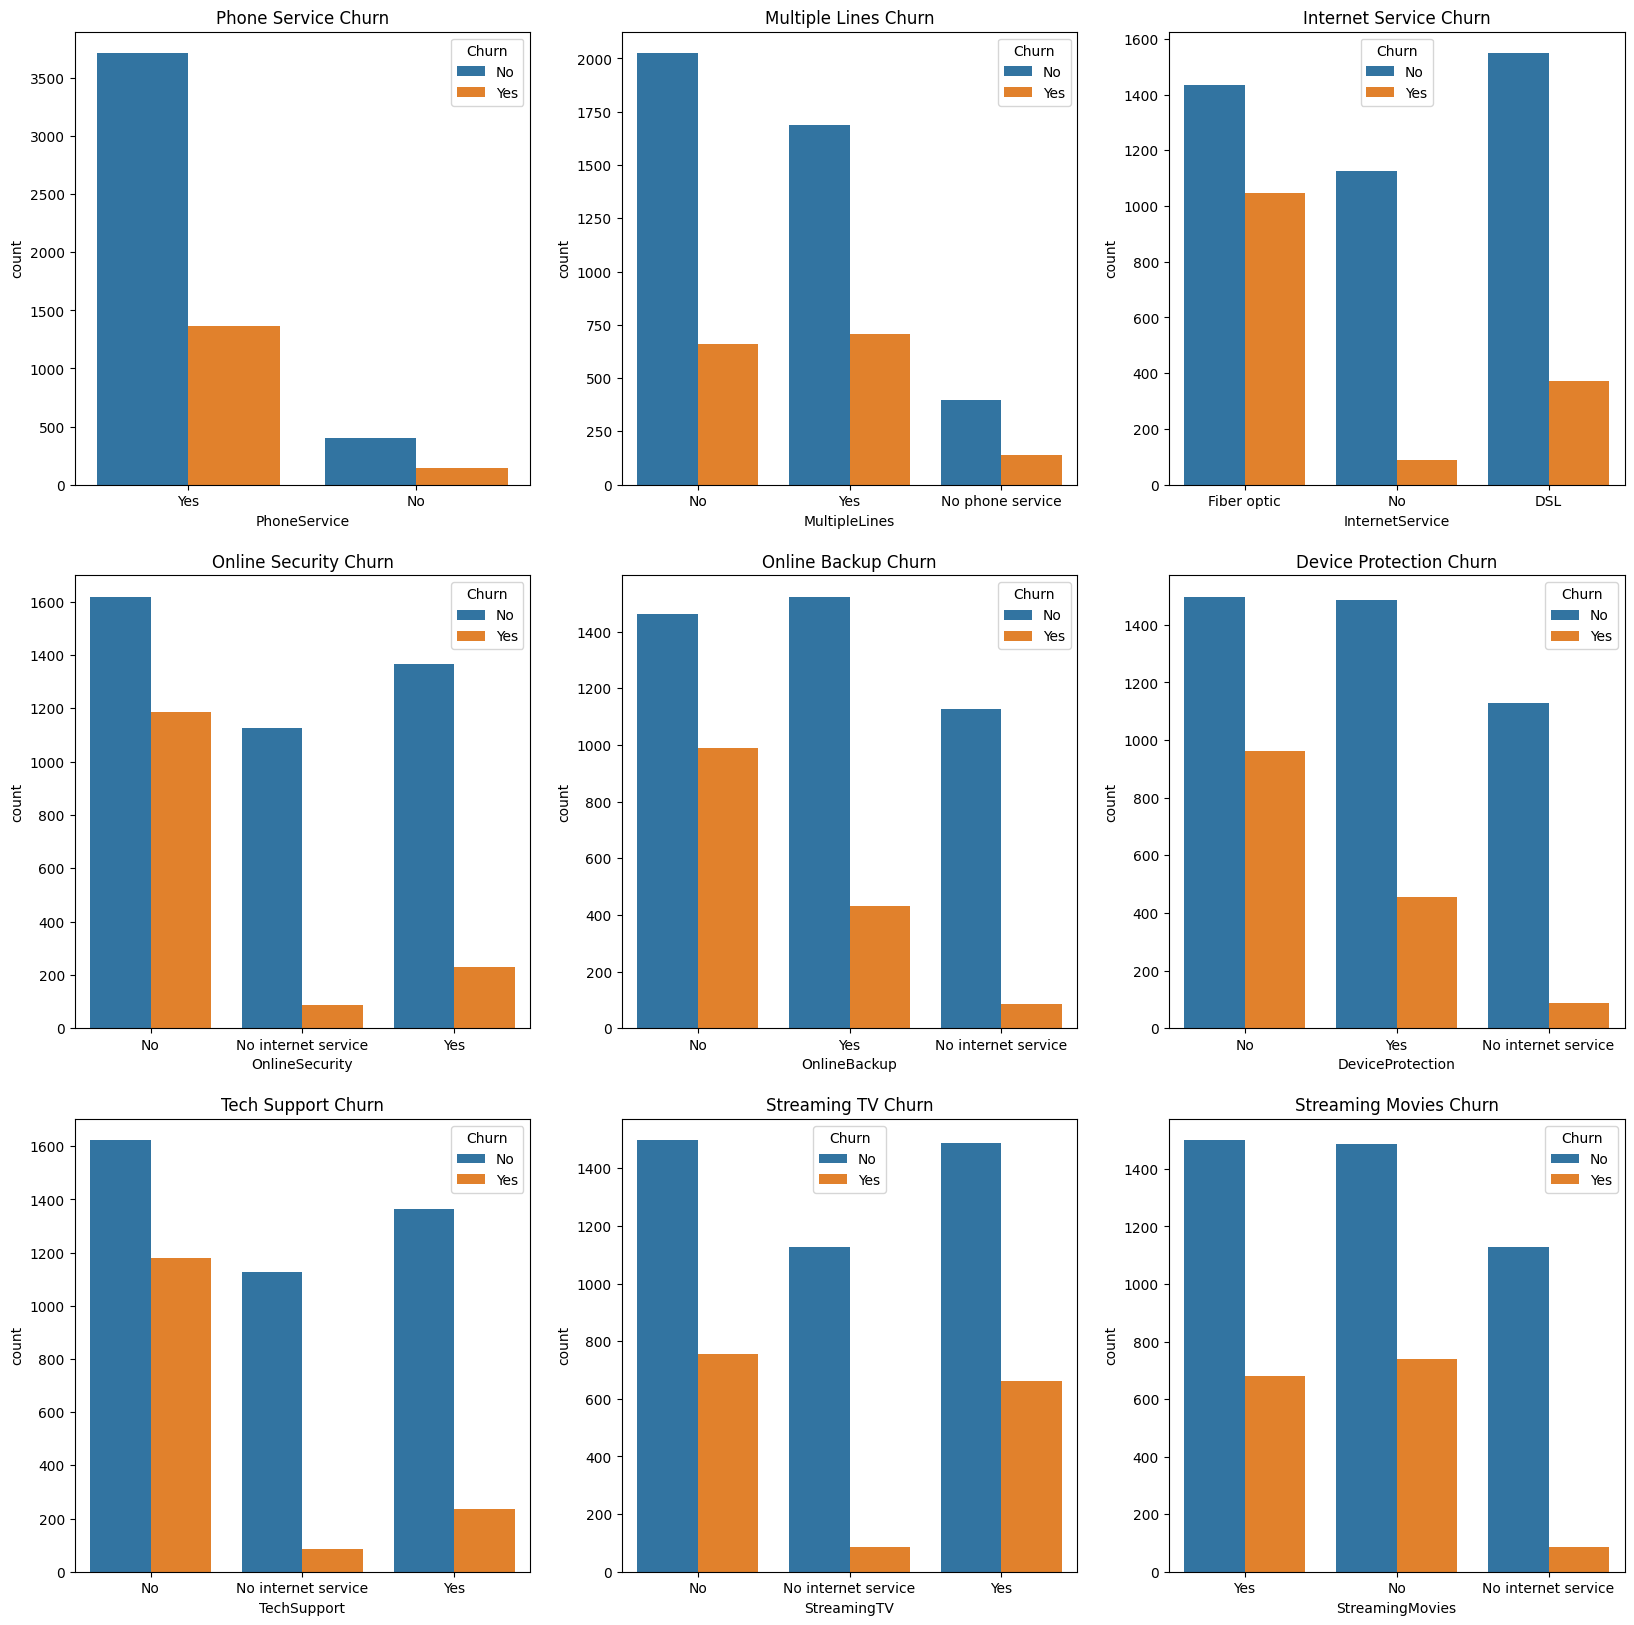

In [34]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service Distribution
sns.countplot(x = x_train['PhoneService'],hue= y_train,ax=ax[0,0],hue_order=["No",'Yes']).set_title('Phone Service Churn')
#Multiple Lines Distribution
sns.countplot(x = x_train['MultipleLines'], hue= y_train, ax=ax[0,1],hue_order=["No",'Yes']).set_title('Multiple Lines Churn')
#Internet Service Distribution
sns.countplot(x = x_train['InternetService'], hue= y_train, ax=ax[0,2],hue_order=["No",'Yes']).set_title('Internet Service Churn')
#Online Security Distribution
sns.countplot(x = x_train['OnlineSecurity'], hue= y_train, ax=ax[1,0],hue_order=["No",'Yes']).set_title('Online Security Churn')
#Online Backup Distribution
sns.countplot(x = x_train['OnlineBackup'], hue= y_train, ax=ax[1,1],hue_order=["No",'Yes']).set_title('Online Backup Churn')
#Device Protection Distribution
sns.countplot(x = x_train['DeviceProtection'], hue= y_train, ax=ax[1,2],hue_order=["No",'Yes']).set_title('Device Protection Churn')
#Tech Support Distribution
sns.countplot(x = x_train['TechSupport'], hue= y_train, ax=ax[2,0],hue_order=["No",'Yes']).set_title('Tech Support Churn')
#Streaming TV Distribution
sns.countplot(x = x_train['StreamingTV'], hue= y_train, ax=ax[2,1],hue_order=["No",'Yes']).set_title('Streaming TV Churn')
#Streaming Movies Distribution
sns.countplot(x = x_train['StreamingMovies'], hue= y_train, ax=ax[2,2],hue_order=["No",'Yes']).set_title('Streaming Movies Churn')

Biểu đồ cho thấy dịch vụ điện thoại và internet không liên quan nhiều đến churn. Tuy nhiên, khách hàng dùng nhiều đường dây, không dùng Online Backup hoặc Device Protection có tỷ lệ rời bỏ cao hơn. Ngược lại, khách hàng có dùng dịch vụ phát trực tuyến ít rời bỏ hơn.

Tóm lại, churn liên quan đến: multiple lines, Online Backup, Device Protection và Streaming Services.



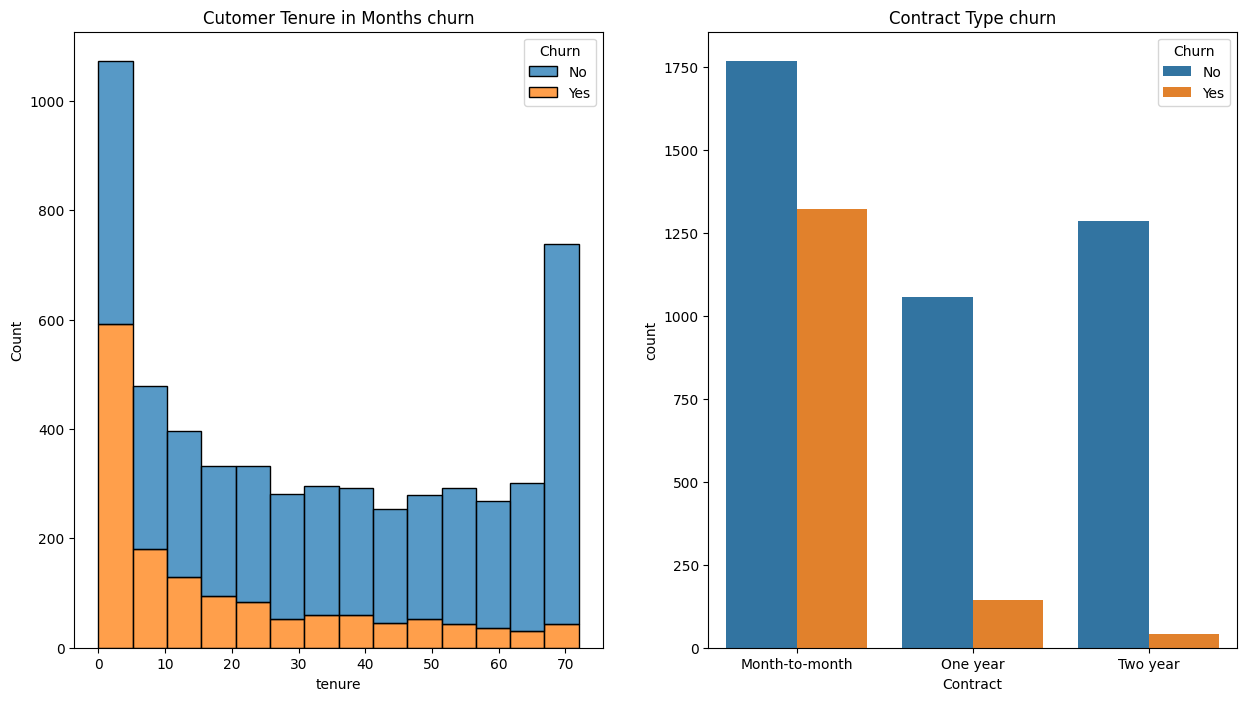

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8));

#Cutomer Tenure in Months Distribution
sns.histplot(x = x_train['tenure'],hue= y_train,ax= ax[0],  multiple = 'stack',hue_order=["No",'Yes']).set_title('Cutomer Tenure in Months churn');
#Contract Type Distribution
sns.countplot(x = x_train['Contract'], hue= y_train,ax= ax[1],hue_order=["No",'Yes']).set_title('Contract Type churn');

Khách hàng gắn bó dưới 5 tháng có tỷ lệ rời bỏ cao; churn giảm dần khi tenure tăng. Khách dùng hợp đồng theo tháng rời bỏ nhiều hơn so với hợp đồng 1–2 năm, chứng tỏ hợp đồng dài hạn giúp giữ chân khách hàng.



Text(0.5, 1.0, 'Total Charges churn')

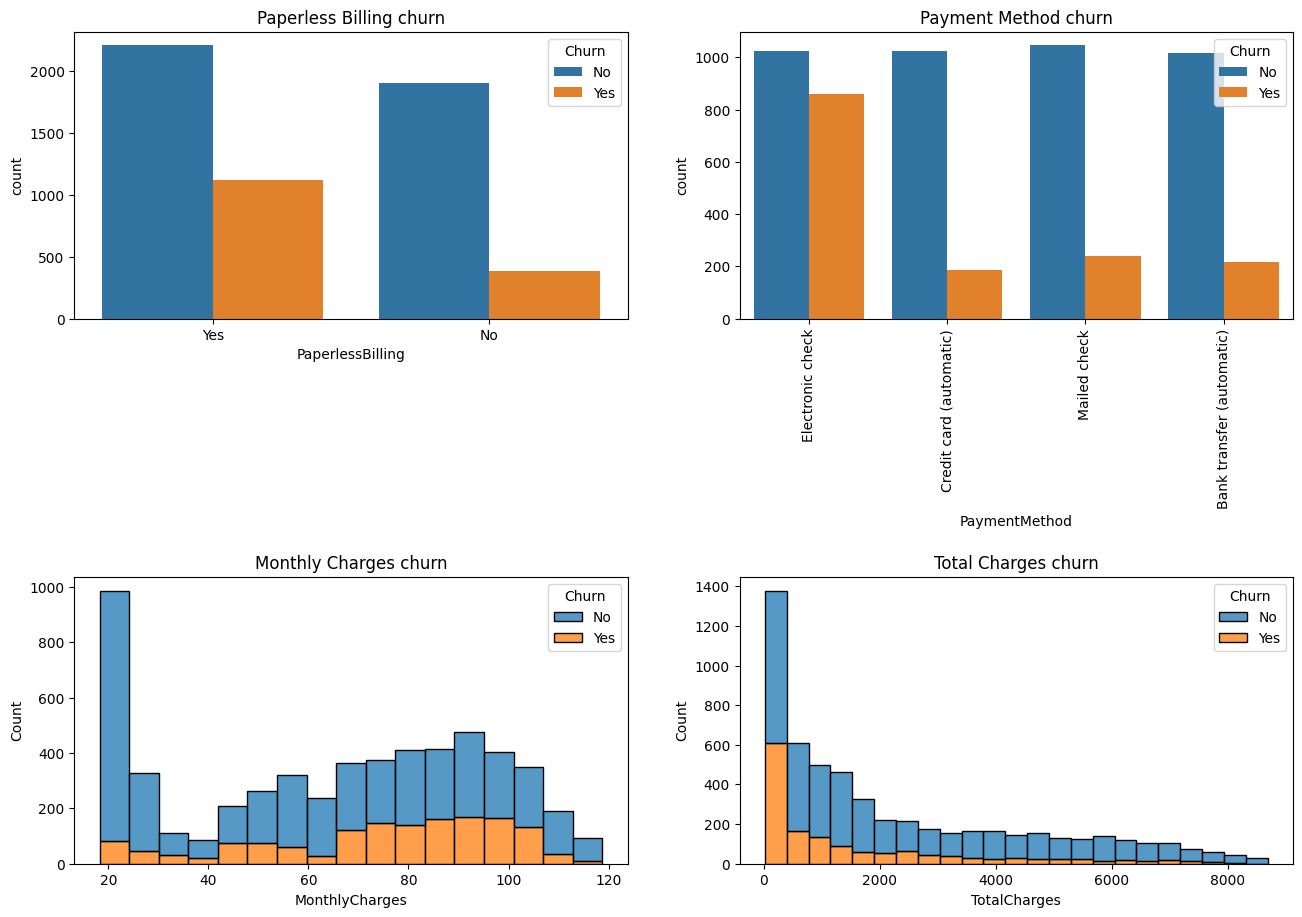

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.tight_layout(pad=5.0)

#spacing between subplots
fig.subplots_adjust(hspace=0.9)
#papaerless billing Distribution
sns.countplot(x = x_train['PaperlessBilling'], hue= y_train,ax=ax[0,0],hue_order=['No','Yes']).set_title('Paperless Billing churn')
#Payment Method Distribution
sns.countplot(x = x_train['PaymentMethod'], hue= y_train, ax=ax[0,1],hue_order=['No','Yes']).set_title('Payment Method churn')
ax[0,1].xaxis.set_tick_params(rotation=90)
#Monthly Charges Distribution
sns.histplot(x = x_train['MonthlyCharges'], hue= y_train,multiple= 'stack', ax = ax[1,0],hue_order=['No','Yes']).set_title('Monthly Charges churn')
#Total Charges Distribution
sns.histplot(x = x_train['TotalCharges'], hue= y_train, multiple= 'stack', ax = ax[1,1],hue_order=['No','Yes']).set_title('Total Charges churn')

Phương thức thanh toán không ảnh hưởng nhiều đến churn. Khách có phí hàng tháng cao dễ rời bỏ, nhưng khách có tổng chi phí cao thường trung thành hơn, có thể vì dùng lâu hoặc dùng nhiều dịch vụ. Công ty nên giảm phí hàng tháng để giữ chân khách hàng.

# Oversampling data

In [37]:
overs = RandomOverSampler()
x_train,y_train = overs.fit_resample(x_train,y_train)

In [38]:
label =LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)

# ma hoa

In [39]:
transfo = ColumnTransformer( transformers=[
    ('phanloai',OneHotEncoder(),['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']),
    ('number',StandardScaler(),['tenure','MonthlyCharges','TotalCharges'])
])

#desison tree

                precision    recall  f1-score   support
           0       0.88      0.71      0.78      1053
           1       0.45      0.71      0.55       352


#Randomforest

In [40]:
random = Pipeline(steps= [
    ('transfo', transfo),
    ('model', RandomForestClassifier(random_state= 42))
 ])
param_random = {
    'model__n_estimators': [200,300,100,500],
    'model__max_depth': [2,4,6]
}

grid_search_random = GridSearchCV(estimator = random, param_grid = param_random, scoring='recall')

grid_search_random.fit(x_train, y_train)

print(grid_search_random.best_params_)

{'model__max_depth': 2, 'model__n_estimators': 100}


In [41]:
random1 = Pipeline(steps= [
    ('transfo', transfo),
    ('model', RandomForestClassifier(max_depth=2,n_estimators= 100, random_state= 42))
 ])
random1.fit(x_train,y_train)

,steps,"[('transfo', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('phanloai', ...), ('number', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
result_random = random1.predict(x_test)

print(classification_report(y_test, result_random))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1053
           1       0.45      0.86      0.59       352

    accuracy                           0.71      1405
   macro avg       0.69      0.76      0.68      1405
weighted avg       0.81      0.71      0.73      1405



In [75]:
dataset.loc[1]

gender                      Male
SeniorCitizen                  0
Partner                       No
Dependents                    No
tenure                      34.0
PhoneService                 Yes
MultipleLines                 No
InternetService              DSL
OnlineSecurity               Yes
OnlineBackup                  No
DeviceProtection             Yes
TechSupport                   No
StreamingTV                   No
StreamingMovies               No
Contract                One year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             56.95
TotalCharges              1889.5
Churn                         No
Name: 1, dtype: object

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1053
           1       0.45      0.86      0.59       352



# support vector machine

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1053
           1       0.49      0.77      0.60       352

Kết quả: dựa trên nhu cầu phát hiện được nhiều cá nhân muốn rời bỏ nhất có thể để đưa ra các biện pháp thu hút và giảm tình trạng khách hàng từ bỏ doanh nghiệp, model hiệu quả nhất là randomforest classcification

C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_13024\2088490643.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="g", label="Actual Value").set_title('randomforest Tree');
C:\Users\TAN PHAT\AppData\Local\Temp\ipykernel_13024\2088490643.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

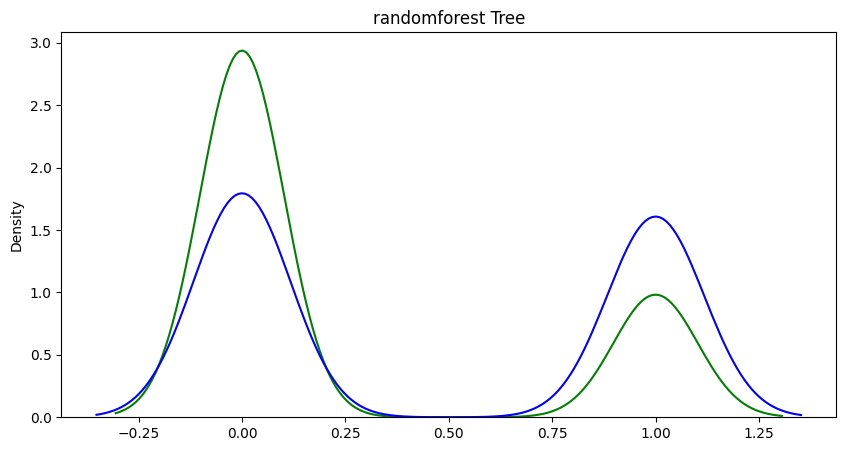

In [43]:
fig, ax = plt.subplots(figsize=(10, 5));

#Decision Tree
sns.distplot(y_test, hist=False, color="g", label="Actual Value").set_title('randomforest Tree');
sns.distplot(result_random, hist=False, color="b", label="Fitted Values");

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

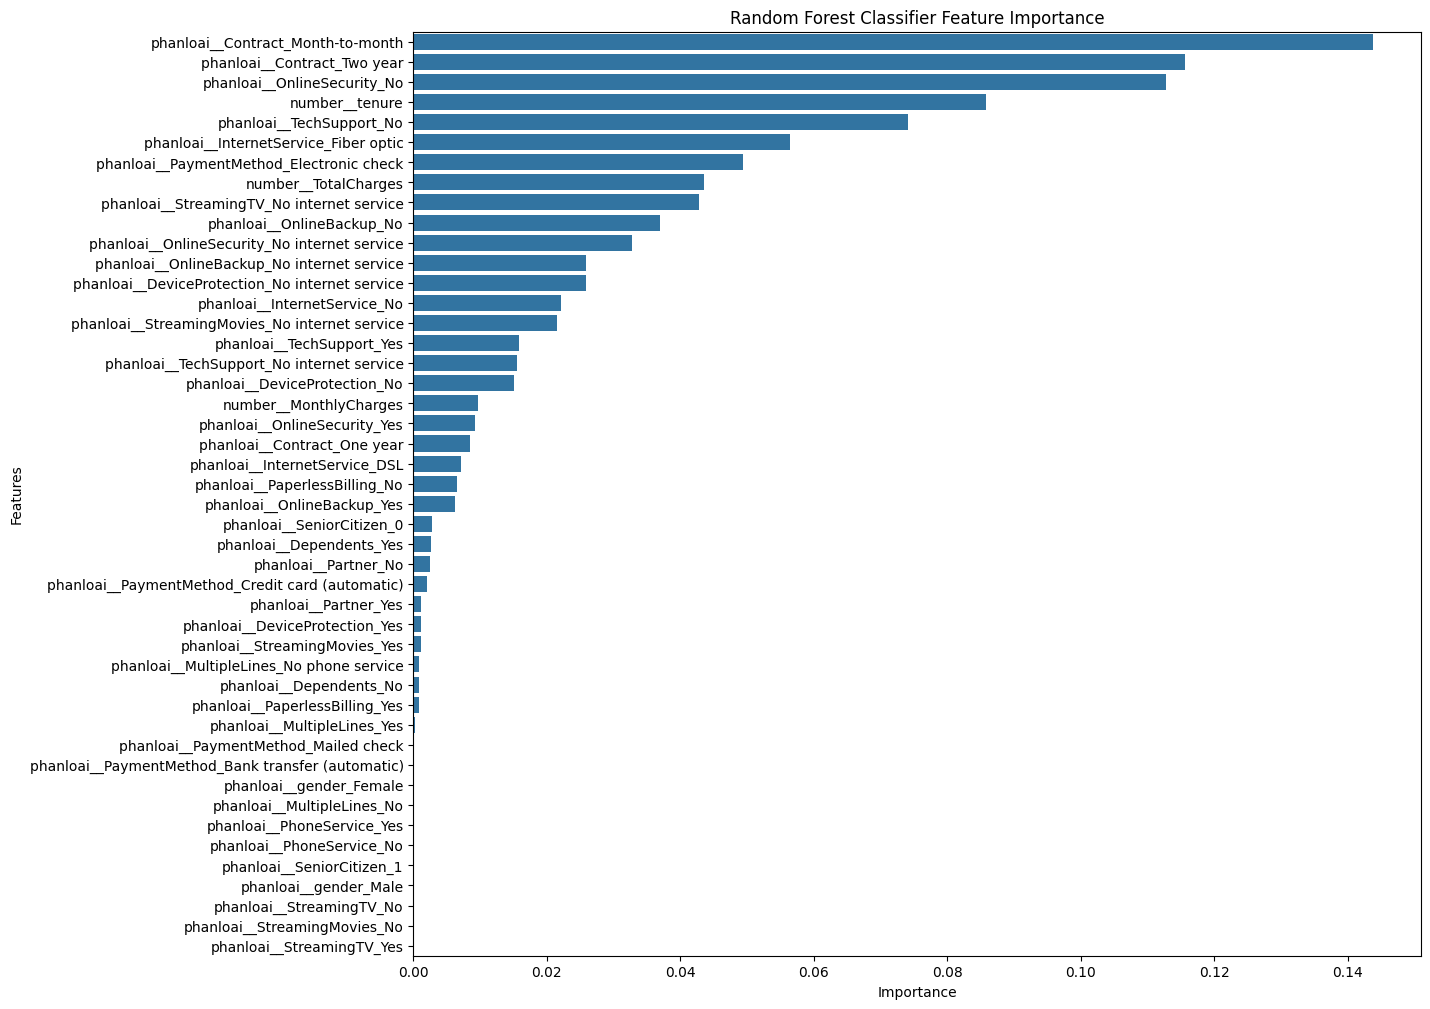

In [44]:
impor=random1.named_steps['transfo']
feature_names = impor.get_feature_names_out()
feature_names

model = random1.named_steps['model']

fig, ax = plt.subplots(figsize=(13, 12))

feature_df = pd.DataFrame({'Features': feature_names, 'Importance':model.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df).set_title('Random Forest Classifier Feature Importance')